<a href="https://colab.research.google.com/github/AmritPramanik/Deep_Learning/blob/main/ANN_Student_admissin_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv("./Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [88]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [89]:
df.drop(columns="Serial No.",inplace=True)

In [90]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [92]:
df.duplicated().sum()

np.int64(0)

In [93]:
x = df.drop(columns="Chance of Admit ")
y = df.iloc[:,-1]

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [95]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
428,316,103,2,2.0,4.5,8.74,0
490,307,105,2,2.5,4.5,8.12,1
53,324,112,4,4.0,2.5,8.10,1
336,319,110,3,3.0,2.5,8.79,0
154,326,108,3,3.0,3.5,8.89,0
...,...,...,...,...,...,...,...
22,328,116,5,5.0,5.0,9.50,1
72,321,111,5,5.0,5.0,9.45,1
493,300,95,2,3.0,1.5,8.22,1
15,314,105,3,3.5,2.5,8.30,0


In [96]:
y_train

,Chance of Admit
428,0.69
490,0.67
53,0.72
336,0.72
154,0.80
...,...
22,0.94
72,0.93
493,0.62
15,0.54


In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
X_test

array([[ 0.85106383,  0.92592593,  1.        ,  1.        ,  1.        ,
         0.81730769,  1.        ],
       [ 0.38297872,  0.33333333,  0.5       ,  0.875     ,  0.75      ,
         0.58974359,  1.        ],
       [ 0.25531915,  0.40740741,  0.25      ,  0.375     ,  0.125     ,
         0.31730769,  0.        ],
       [ 1.        ,  0.74074074,  0.75      ,  1.        ,  1.        ,
         0.94230769,  1.        ],
       [ 0.06382979,  0.22222222,  0.25      ,  0.375     ,  0.375     ,
         0.39423077,  0.        ],
       [ 0.46808511,  0.40740741,  0.5       ,  0.75      ,  0.375     ,
         0.41666667,  0.        ],
       [ 0.65957447,  0.51851852,  0.75      ,  0.75      ,  0.875     ,
         0.66346154,  1.        ],
       [ 0.34042553,  0.44444444,  0.25      ,  0.375     ,  0.75      ,
         0.28205128,  0.        ],
       [ 0.23404255,  0.14814815,  0.25      ,  0.125     ,  0.25      ,
         0.26923077,  0.        ],
       [ 0.25531915,  0.4444

In [99]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [100]:
model = Sequential()
model.add(Dense(7,activation="relu",input_dim = 7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])

In [103]:
histry = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.0000e+00 - loss: 0.7525 - val_accuracy: 0.0000e+00 - val_loss: 0.6266
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: 0.6206 - val_accuracy: 0.0000e+00 - val_loss: 0.5318
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.5191 - val_accuracy: 0.0000e+00 - val_loss: 0.4748
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.4684 - val_accuracy: 0.0000e+00 - val_loss: 0.4276
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.4165 - val_accuracy: 0.0000e+00 - val_loss: 0.3812
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.3844 - val_accuracy: 0.0000e+00 - val_loss: 0.3343
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.3338 - val_accuracy: 0.0000e+00 - val_loss: 0.2861
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - a

In [104]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [105]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6251638863059052

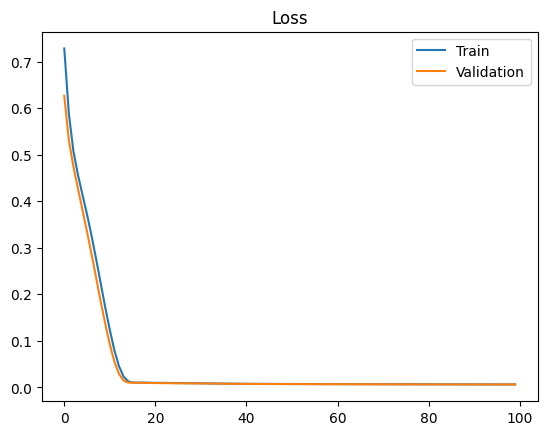

In [106]:
plt.plot(histry.history['loss'])
plt.plot(histry.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', 'Validation'])
plt.show()